In [1]:
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

import sys
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

## NICE 기업신용평가 2011-2019

In [2]:
df1 = pd.read_excel("2011-nice.xls")
df1.tail()

,기업신용평가 502건,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
499,(주)신세계,본,NaN,NaN,AA+,Stable,2011.01.04,2011.01.04,2011.12.14
500,롯데카드(주),수시,AA,Stable,AA,Positive,2011.01.03,2011.01.03,2018.04.29
501,삼성카드(주),수시,AA,Positive,AA+,Stable,2011.01.03,2011.01.03,2026.03.10
502,신한카드(주),수시,AA,Positive,AA+,Stable,2011.01.03,2011.01.03,2018.04.29
503,현대카드(주),수시,AA,Positive,AA+,Stable,2011.01.03,2011.01.03,2018.04.29


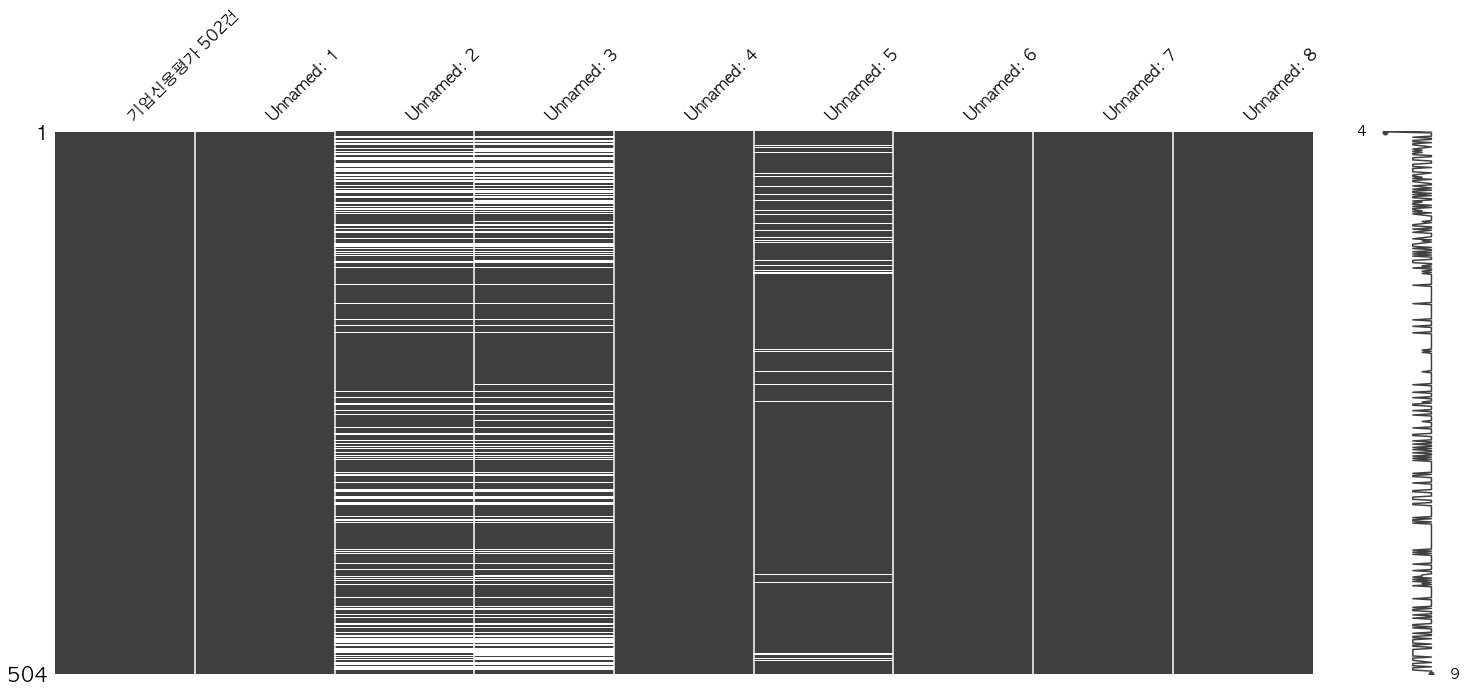

In [3]:
msno.matrix(df1)
plt.show()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기업신용평가 502건  503 non-null    object
 1   Unnamed: 1   503 non-null    object
 2   Unnamed: 2   374 non-null    object
 3   Unnamed: 3   362 non-null    object
 4   Unnamed: 4   504 non-null    object
 5   Unnamed: 5   475 non-null    object
 6   Unnamed: 6   503 non-null    object
 7   Unnamed: 7   503 non-null    object
 8   Unnamed: 8   503 non-null    object
dtypes: object(9)
memory usage: 35.6+ KB


In [5]:
def screen_name(df):
    df = df[[df.columns[0],'Unnamed: 4','Unnamed: 6']]
    df.columns = df.loc[0]
    df = df.drop([0,1])
    df["등급결정일"] = df["등급결정일"].apply(lambda x: int(str(x)[:4].replace(".","")))
    df["현재"][df["현재"] == "취소"] = np.nan
    df["기업명"] = df["기업명"].apply(lambda x: str(x).replace("(주)",""))
    df = df.dropna()
    return df

In [6]:
credit_dlist={"D":0,"C-":1,"C":2,"C+":3,"CC-":4,"CC":5,"CC+":6,"CCC-":7,"CCC":8,"CCC+":9,
              "B-":10,"B":11,"B+":12,"BB-":13,"BB":14,"BB+":15,"BBB-":16,"BBB":17,"BBB+":18,
              "A-":19,"A":20,"A+":21,"AA-":22,"AA":23,"AA+":24,"AAA-":25,"AAA":26,"AAA+":27}
def screen_str(df):
    df["현재"] = df["현재"].astype("str")
    df["현재"] = df["현재"].apply(lambda x: str(x).replace("↓",""))
    df["현재"] = df["현재"].apply(lambda x: str(x).replace("↑",""))
    df["현재"] = df["현재"].apply(lambda x: str(x).replace("◆","")) 
    df['현재'] = df['현재'].apply(credit_dlist.get)
    return df

In [7]:
file_list_n = ["2011-nice.xls","2012-nice.xls","2013-nice.xls","2014-nice.xls","2015-nice.xls","2016-nice.xls",
              "2017-nice.xls","2018-nice.xls","2019-nice.xls"]


mod = sys.modules[__name__]
for i in range(2011,2020):
    setattr(mod, 'df_nice_{}'.format(i),screen_str(screen_name(pd.read_excel(file_list_n[i-2011]))))


# df_list = []
# for file in file_list_n:
#     df = pd.read_excel(file)
#     df_list.append(screen_str(screen_name(df)))
#     df_concat_nice = pd.concat(df_list)

/Users/yeonghwanchoi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df_nice_2011

,기업명,현재,등급결정일
2,솔로몬저축은행,11,2011
3,토마토저축은행,5,2011
4,한진해운,19,2011
5,삼환기업,17,2011
6,코오롱글로텍,18,2011
7,팬오션,20,2011
8,현대상선,20,2011
9,한국관광공사,26,2011
10,신세계,24,2011
11,대한전선,17,2011


## ESG 기업평가 2011-2019

In [9]:
df_esg = pd.read_csv("2011-2019-ESG.tsv", sep='\t')
df_esg.head()

,NO,기업명,기업코드,ESG등급,지배구조,사회,환경,평가년도,비고
0,6567,AJ네트웍스,95570,B,B,B,C이하,2019,NaN
1,6566,AJ렌터카,68400,C이하,C,B,B,2019,NaN
2,6565,AK홀딩스,6840,B,B,B,C이하,2019,NaN
3,6564,AP시스템,265520,C이하,B,C이하,C이하,2019,NaN
4,6563,BGF,27410,B,B,A,C이하,2019,NaN


In [10]:
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      6567 non-null   int64 
 1   기업명     6567 non-null   object
 2   기업코드    6567 non-null   int64 
 3   ESG등급   6306 non-null   object
 4   지배구조    6563 non-null   object
 5   사회      6346 non-null   object
 6   환경      6154 non-null   object
 7   평가년도    6567 non-null   int64 
 8   비고      188 non-null    object
dtypes: int64(3), object(6)
memory usage: 461.9+ KB


In [11]:
df_esg = df_esg.drop(['NO', '비고'], axis=1).dropna()
df_esg['ESG등급'] = df_esg['ESG등급'].apply({"S":30.0,"A+":25.7,"A":21.4,"B+":17.1,"B":21.9,"C":8.6,"D":4.3, "C이하":8.4, "B이하":21.9}.get) 
df_esg['지배구조'] = df_esg['지배구조'].apply({"S":30.0,"A+":25.7,"A":21.4,"B+":17.1,"B":21.9,"C":8.6,"D":4.3, "C이하":8.4,"B이하":21.9}.get) 
df_esg['사회']    = df_esg['사회'].apply({"S":30.0,"A+":25.7,"A":21.4,"B+":17.1,"B":21.9,"C":8.6,"D":4.3, "C이하":6.4,"B이하":21.9}.get) 
df_esg['환경']    = df_esg['환경'].apply({"S":30.0,"A+":25.7,"A":21.4,"B+":17.1,"B":21.9,"C":8.6,"D":4.3, "C이하":6.4,"B이하":21.9}.get) 
df_esg["기업코드"] = df_esg["기업코드"].apply(lambda x: str(x))
dflist = list(df_esg["기업코드"].values)
for i in range(len(df_esg)):
    if len(dflist[i]) < 3:
        dflist[i] = "0000" + dflist[i]
    elif len(dflist[i]) < 4:
        dflist[i] ="000" + dflist[i]
    elif len(dflist[i]) < 5:
        dflist[i] ="00" + dflist[i]
    elif len(dflist[i]) < 6:
        dflist[i] = "0" + dflist[i]
df_esg["기업코드"] = dflist 

In [12]:
df_esg.tail()

,기업명,기업코드,ESG등급,지배구조,사회,환경,평가년도
6555,화천기계,010660,21.9,21.9,21.9,21.9,2011
6559,효성,004800,21.9,17.1,21.9,17.1,2011
6561,후성,093370,21.9,8.6,21.9,21.9,2011
6562,휴니드테크놀러지스,005870,17.1,8.6,17.1,21.9,2011
6564,휴켐스,069260,21.9,17.1,21.9,17.1,2011


In [13]:
for i in range(2011,2020):
    setattr(mod, 'df_esg_{}'.format(i),df_esg[df_esg["평가년도"]==i])

In [14]:
df_esg_2011.tail()

,기업명,기업코드,ESG등급,지배구조,사회,환경,평가년도
6555,화천기계,010660,21.9,21.9,21.9,21.9,2011
6559,효성,004800,21.9,17.1,21.9,17.1,2011
6561,후성,093370,21.9,8.6,21.9,21.9,2011
6562,휴니드테크놀러지스,005870,17.1,8.6,17.1,21.9,2011
6564,휴켐스,069260,21.9,17.1,21.9,17.1,2011


## 시가총액

In [15]:
df2 = pd.read_csv("marcap-2011.csv")
df2.head()

,Code,Name,Close,Changes,ChagesRatio,Volume,Amount,Open,High,Low,Marcap,MarcapRatio,Stocks,ForeignShares,ForeignRatio,Rank,Date
0,005930,삼성전자,958000,9000,1.0,265562,254246714088,955000,966000,950000,141112764846000,11.27,147299337,74518914.0,50.59,1,2011-01-03
1,005490,POSCO,486000,-1000,-0.2,170542,82998761000,487000,489500,482000,42372801810000,3.38,87186835,43377735.0,49.75,2,2011-01-03
2,005380,현대차,177000,3500,2.0,556135,97468816500,174000,177000,173500,38988936783000,3.11,220276479,94245489.0,42.79,3,2011-01-03
3,009540,현대중공업,435000,-8000,-1.8,256635,111611214500,443000,443500,431000,33060000000000,2.64,76000000,15350207.0,20.20,4,2011-01-03
4,012330,현대모비스,294500,10000,3.5,212902,61730122000,287500,294500,285000,28667767653500,2.29,97343863,46134411.0,47.39,5,2011-01-03


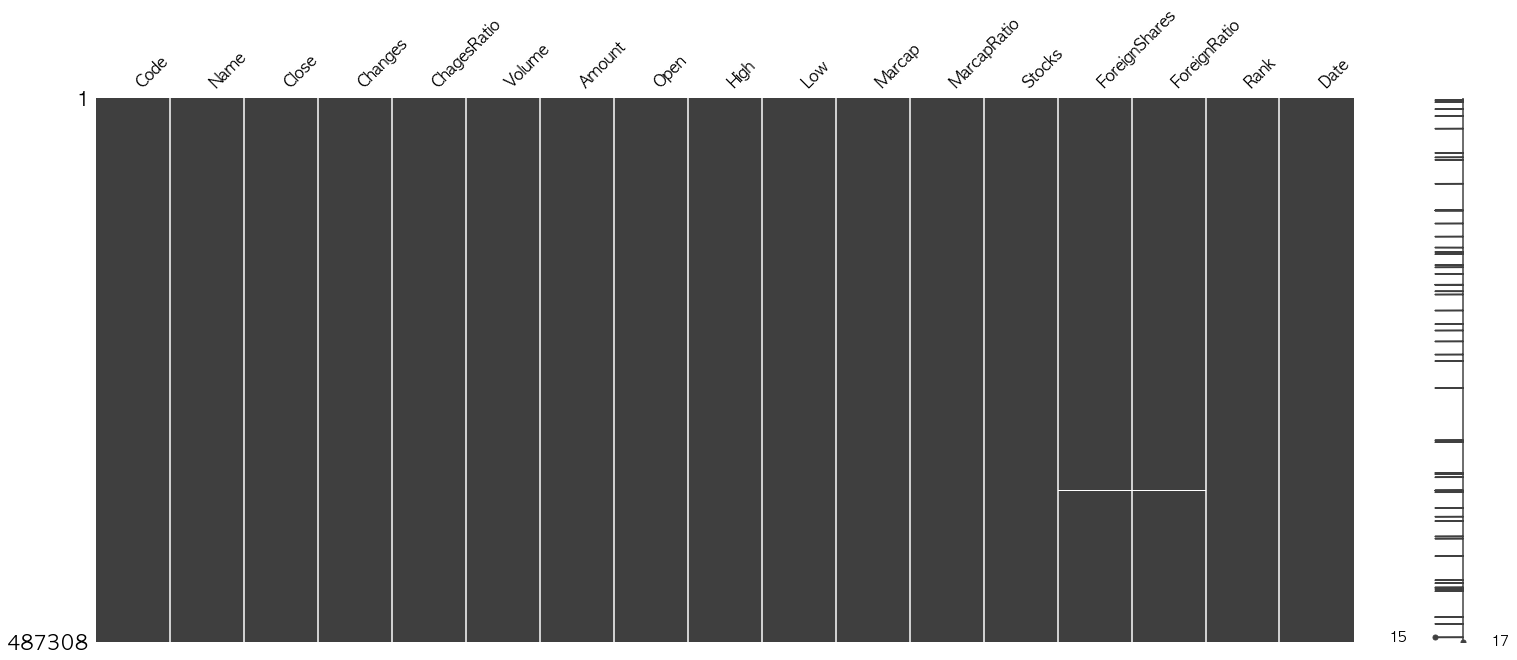

In [16]:
msno.matrix(df2)
plt.show()

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487308 entries, 0 to 487307
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Code           487308 non-null  object 
 1   Name           487308 non-null  object 
 2   Close          487308 non-null  int64  
 3   Changes        487308 non-null  int64  
 4   ChagesRatio    487308 non-null  float64
 5   Volume         487308 non-null  int64  
 6   Amount         487308 non-null  int64  
 7   Open           487308 non-null  int64  
 8   High           487308 non-null  int64  
 9   Low            487308 non-null  int64  
 10  Marcap         487308 non-null  int64  
 11  MarcapRatio    487308 non-null  float64
 12  Stocks         487308 non-null  int64  
 13  ForeignShares  487230 non-null  float64
 14  ForeignRatio   487230 non-null  float64
 15  Rank           487308 non-null  int64  
 16  Date           487308 non-null  object 
dtypes: float64(4), int64(10), obj

In [18]:
file_list_a = ["marcap-2011.csv","marcap-2012.csv","marcap-2013.csv","marcap-2014.csv","marcap-2015.csv",
               "marcap-2016.csv","marcap-2017.csv","marcap-2018.csv","marcap-2019.csv"]

def screen_data(df):
    df = df[["Code","Name","Date","Marcap"]]
    df["Date"] = df["Date"].apply(lambda x: int(str(x).replace("-","")))
    df = df.drop_duplicates(['Name'],keep="last")
    return df
    
    #df.drop_duplicates(['column_name','column_name1'],keep="last")

for i in range(2011,2020):
    setattr(mod, 'df_market_{}'.format(i),screen_data(pd.read_csv(file_list_a[i-2011])))


/Users/yeonghwanchoi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df_market_2012

,Code,Name,Date,Marcap
12408,003070,코오롱건설,20120110,143715031390
12545,022520,코오롱아이넷,20120110,100222294200
13750,003075,코오롱건우,20120110,3284435700
16121,026870,대한가스,20120112,285180000000
23366,032930,에이스앤파트너스,20120117,18498556605
25868,003457,현대증권2우,20120119,580861261600
27633,061050,지앤디윈텍,20120119,120475035
39293,093820,한국유전15-1,20120131,11062220000
39459,046720,엔하이테크,20120131,557768470
39473,037380,에이원마이크로,20120131,66428361


## 재무상태표

In [20]:
df3 = pd.read_excel("영업활동현금흐름.xlsx")
df3.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
2212,950130,엑세스바이오,12,천원,-422239.0,-5730652.0,-5445311.0,2553507.0,2967795.0,-2633921.0,1587126.0,1845660.0,-2351654.0,1915059.0,NaN,NaN
2213,950140,잉글우드랩,12,천원,12115959.0,-9368274.0,-8980775.0,-3506442.0,-471765.0,6338815.0,NaN,NaN,NaN,NaN,NaN,NaN
2214,950160,코오롱티슈진,12,천원,-43856498.0,-36048325.0,-38815829.0,-3498024.0,-5610900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2215,950170,JTC,02,천원,NaN,13138388.0,3706136.0,46183777.0,9076766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2216,950180,SNK,07,천원,32821083.0,22198273.0,25146954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


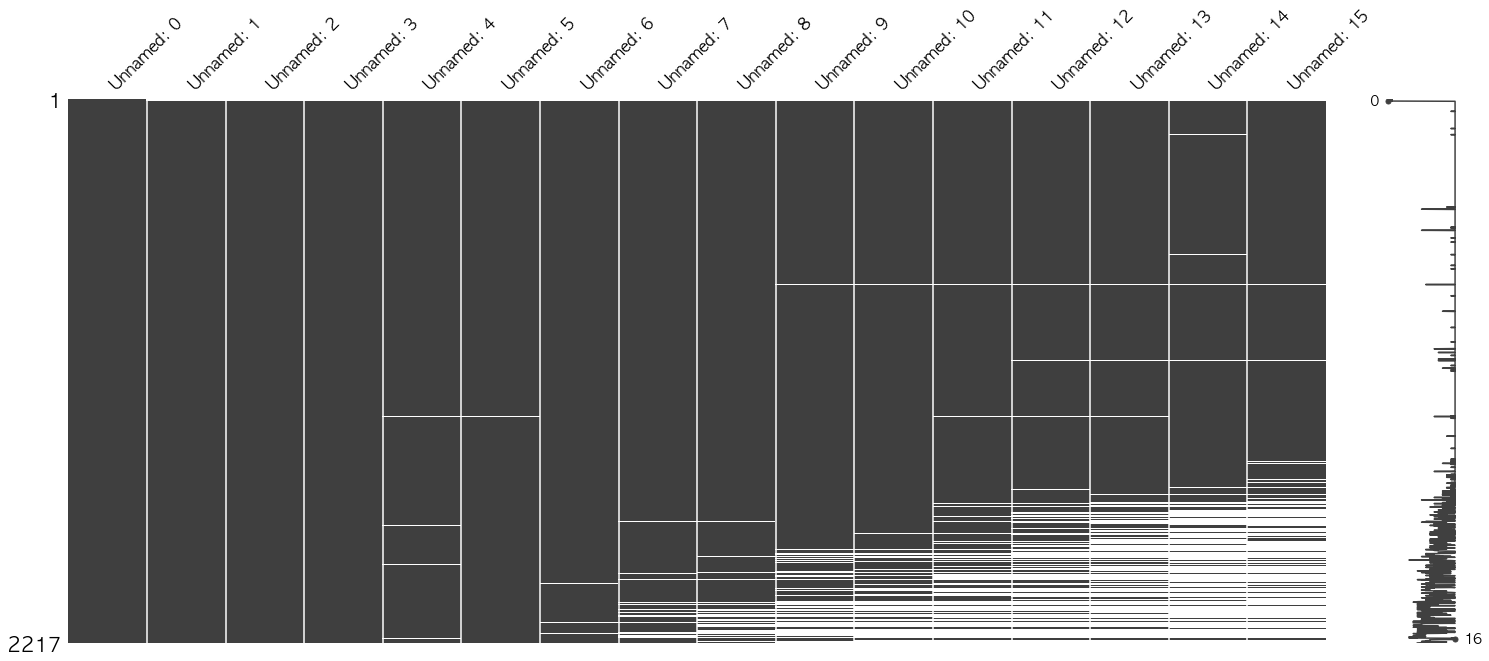

In [21]:
msno.matrix(df3)
plt.show()

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2215 non-null   object 
 1   Unnamed: 1   2209 non-null   object 
 2   Unnamed: 2   2209 non-null   object 
 3   Unnamed: 3   2209 non-null   object 
 4   Unnamed: 4   2188 non-null   float64
 5   Unnamed: 5   2203 non-null   float64
 6   Unnamed: 6   2190 non-null   float64
 7   Unnamed: 7   2147 non-null   float64
 8   Unnamed: 8   2107 non-null   float64
 9   Unnamed: 9   2048 non-null   float64
 10  Unnamed: 10  1988 non-null   float64
 11  Unnamed: 11  1927 non-null   float64
 12  Unnamed: 12  1858 non-null   float64
 13  Unnamed: 13  1805 non-null   float64
 14  Unnamed: 14  1736 non-null   float64
 15  Unnamed: 15  1700 non-null   float64
dtypes: float64(12), object(4)
memory usage: 277.2+ KB


In [23]:
df_f = ["영업활동현금흐름.xlsx","EBITDA.xlsx","CAPEX.xlsx","당기순이익.xlsx","총차입부채.xlsx","자산총계.xlsx","매출액.xlsx","EBIT.xlsx",
       "차입부채_EBITDA.xlsx","부채비율.xlsx","차입금의존도.xlsx"]

def change_columns(df):
    columns = ["종목코드","기업명","결산월","단위","2019","2018","2017","2016","2015","2014","2013","2012","2011","2010","2009","2008"]
    df.columns = columns
    return df

for i in range(10):
    setattr(mod, 'df_balance_{}'.format(i), change_columns(pd.read_excel(df_f[i])[9:]))


In [24]:
df_balance_1.tail()

,종목코드,기업명,결산월,단위,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
2212,950130,엑세스바이오,12,천원,-4618616.0,-1309755.0,-4323092.0,1554832.0,1783169.0,3410173.0,12071719.0,9056510.0,1895300.0,2373321.0,NaN,NaN
2213,950140,잉글우드랩,12,천원,11285918.0,2773385.0,-7166733.0,7812091.0,6816708.0,5151812.0,NaN,NaN,NaN,NaN,NaN,NaN
2214,950160,코오롱티슈진,12,천원,-43229660.0,-34030191.0,-40178976.0,-3546394.0,-5733074.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2215,950170,JTC,02,천원,NaN,28583089.0,35722888.0,36422234.0,93503979.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2216,950180,SNK,07,천원,47619725.0,37268232.0,33648805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
